## NEURAL NETWORK (2-LAYER)

In [1]:
#Dependencies

import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(1)

In [2]:
#function to plot decision boundaries
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [3]:
#funcion to load datasets

def load__datasets():  
    N = 200
    circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return circles, moons, blobs, gaussian_quantiles, no_structure

In [4]:
#function to calculate sigmoid of an element
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

In [5]:
#the main neural network model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False, learning_rate = 1.2):
    np.random.seed(3)
    
    #define input and output layer size
    n_x = X.shape[0]
    n_y = Y.shape[0]
    m = Y.shape[1]                       # number of training example
    
    
    #initialize parameters
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    
    for i in range(0, num_iterations):
        
        #forward propagation
        Z1 = np.dot(W1, X) + b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

        #cost computation
        logprobs = (np.multiply(np.log(A2), Y)) + (np.multiply(np.log(1-A2), (1-Y)))
        cost = - (1/m)*np.sum(logprobs)
        cost = np.squeeze(cost)

        #backward propagation
        dZ2 = A2 - Y
        dW2 = (1/m)*(np.dot(dZ2, A1.T))
        db2 = (1/m)*(np.sum(dZ2, axis= 1, keepdims = True))
        dZ1 = (np.dot(W2.T, dZ2))*(1-(np.power(A1, 2)))
        dW1 = (1/m)*np.dot(dZ1, X.T)
        db1 = (1/m)*(np.sum(dZ1, axis=1, keepdims = True))

        #parameter updation
        W1 = W1 - learning_rate*dW1
        b1 = b1 - learning_rate*db1
        W2 = W2 - learning_rate*dW2
        b2 = b2 - learning_rate*db2
    
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
   # parameters = {"W1":W1, "b1":b1, "W2":W2, "b2":b2}
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
        
    return parameters
    
    
    
    

In [6]:
#function to make predictions with updated parameters

def predict(X, parameters):
        
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    #forward pass to get the predicted output with updated parameters
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    predictions = np.where(A2>0.5, 1, 0)
    
    return predictions

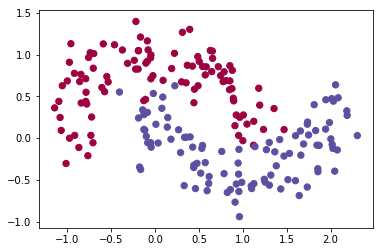

In [7]:
#loading dataset
N = 200
X, Y = sklearn.datasets.make_moons(n_samples=N, noise=.2)
X, Y = X.T, Y.reshape(1, Y.shape[0])

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

Accuracy for of the model is : 99.0 %


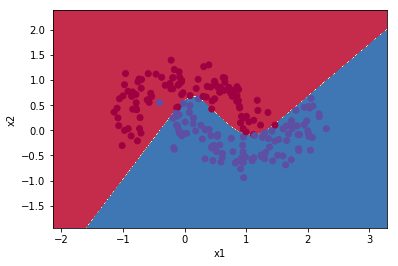

In [8]:
parameters = nn_model(X, Y, 4, num_iterations = 5000)
plot_decision_boundary(lambda x: predict(x.T, parameters), X, Y)
predictions = predict(X, parameters)
accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
print ("Accuracy for of the model is : {} %".format(accuracy))